# Ensembles
In this problem we are going to analyze the breast cancer dataset to predict whether or not an individual suffers from diabetes.  We will be using decision tree classifier with and without the meta methods – Bagging and Boosting. You are free to use either Python or R (take your pick) for this problem.

Split the data into training and test set using [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with **random state 20** and **test_size = 0.33**.  Note that the random_state parameter is different from HW2.

(a) Fit a classification tree. Plot the tree, and report the mean error rate (fraction of incorrect labels) on test data. Report the confusion matrix. You can use rpart in R to fit the decision tree. In python, use the scikit learn’s tree package.

(b) Apply the random forest classifier to this dataset. Mention any design choices (with reasoning/justification) that you made, e.g. number of trees used, and number of features considered for each tree. Report the mean error rate and the confusion matrix.

(c) Use gradient boosted decision tree (gbdt) to classify the data. Again, you should mention any design choices that you made.  You can use gbm package in R. Report the mean error rate and the confusion matrix.


For random forests and gradient boosted decision trees in python, use scikit learn’s ensemble package.

Show the error rates (misclassification rate) obtained from these three models in a table. **How do these
models compare in terms of the misclassification rate?**

(a)

In [1]:
from sklearn import datasets
data = datasets.load_breast_cancer()
X = data.data
y = data.target

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=20)

In [4]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

def get_mer(y_true,y_pred):
    return np.sum(np.abs(y_true - y_pred))/float(np.shape(y_true)[0])

n, p = np.shape(X_train)
clf = DecisionTreeClassifier(max_depth = 3, random_state = 0)

clf.fit(X_train,y_train)
y_pred_tree = clf.predict(X_test)

print ("Decision tree conf matrix:")
print (confusion_matrix(y_test, y_pred_tree))
print ("Decision tree mer:")
print (get_mer(y_test,y_pred_tree))

Decision tree conf matrix:
[[ 69   2]
 [ 15 102]]
Decision tree mer:
0.0904255319149


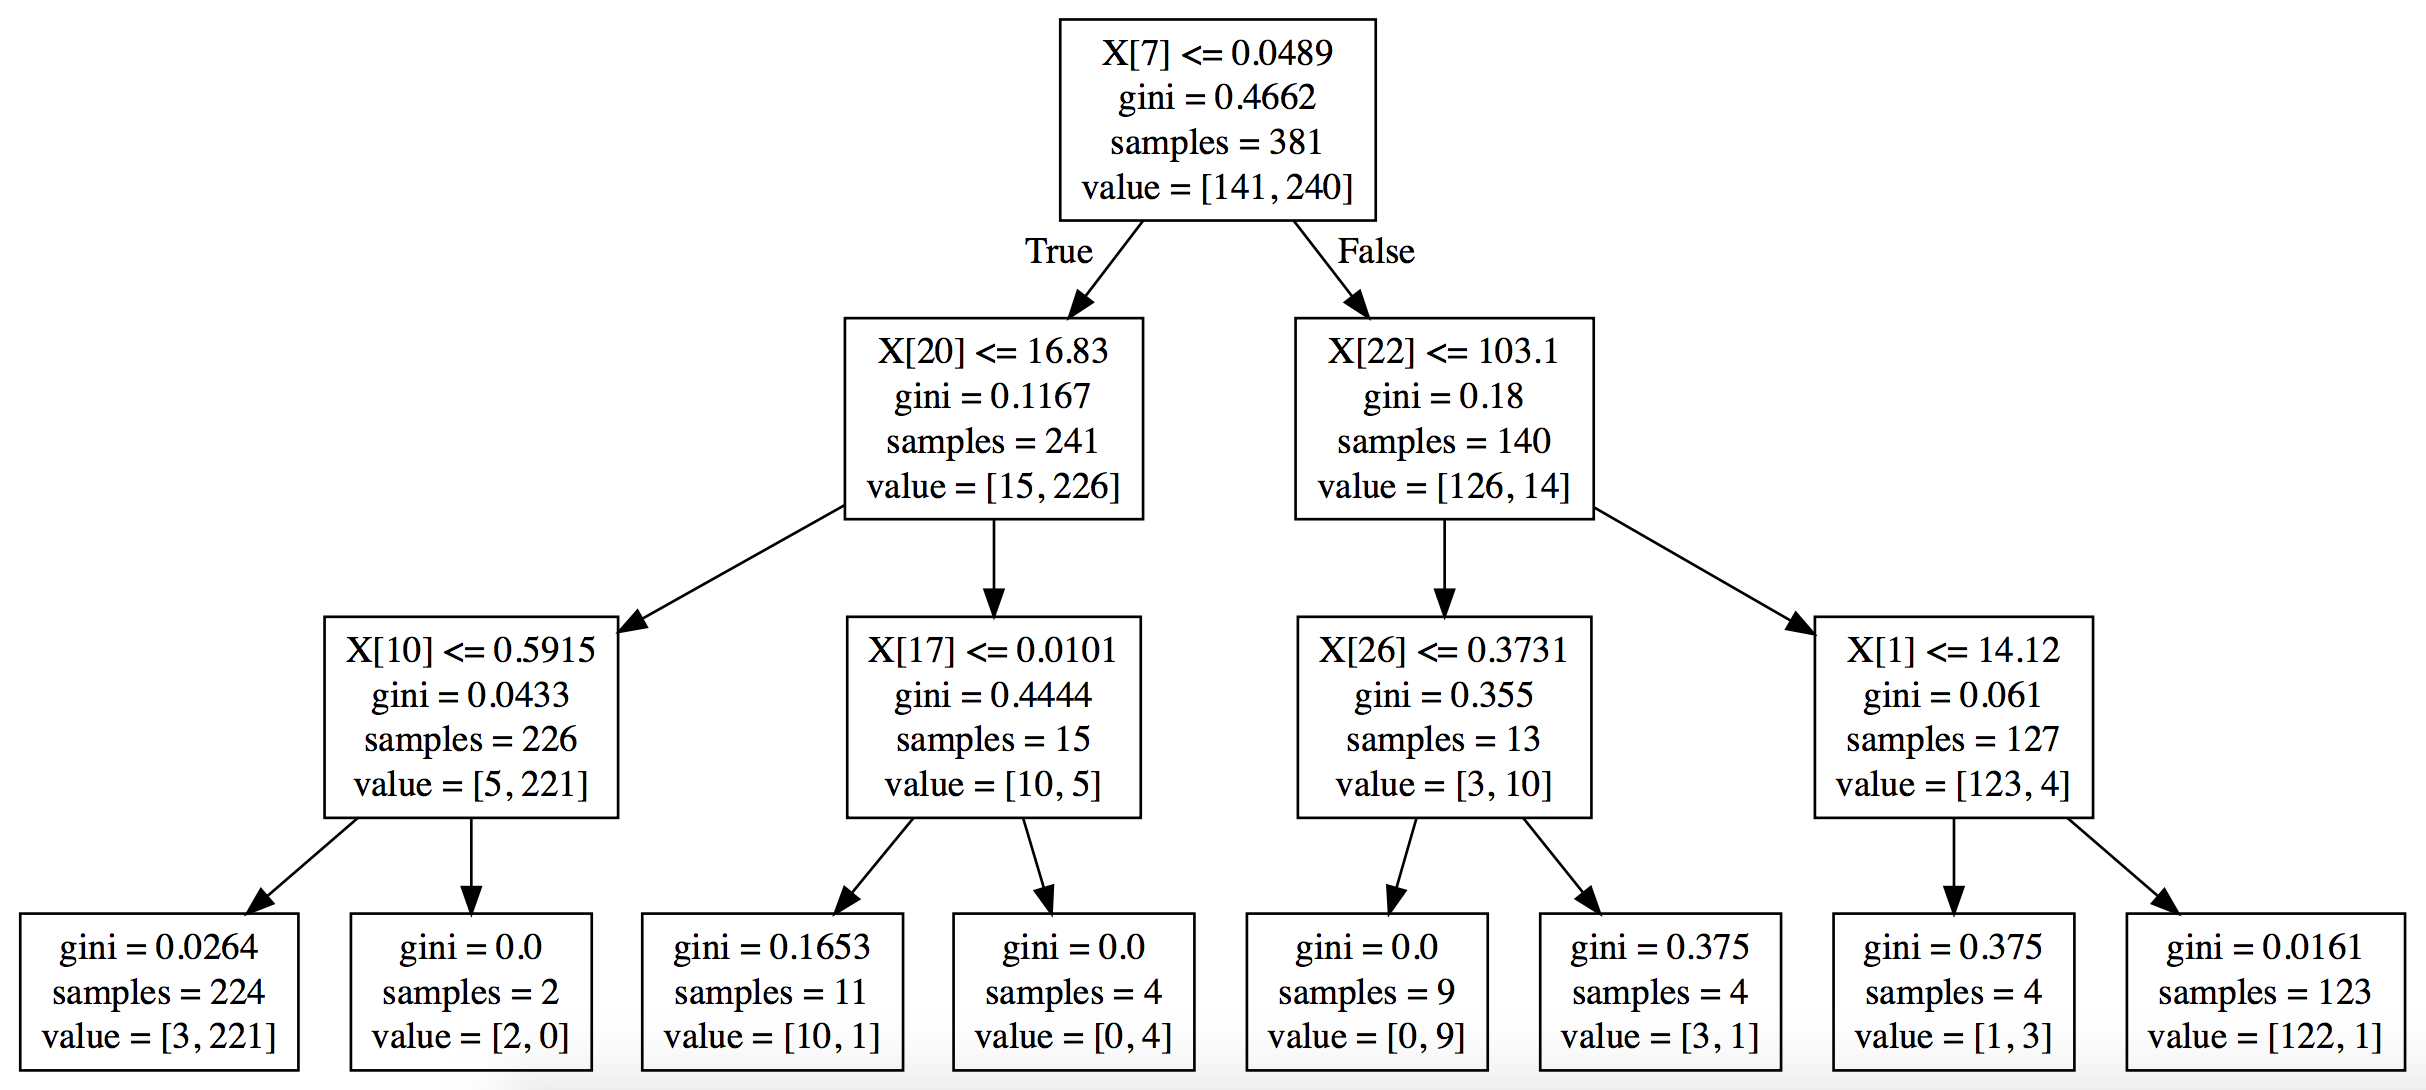

In [5]:
from sklearn.externals.six import StringIO
with open("tree.dot", 'w') as f:
    f = export_graphviz(clf, out_file=f)

from IPython.display import Image
Image(filename='tree.png')


(b)

In [6]:
clf = RandomForestClassifier(random_state=0)

param_grid = {"n_estimators": [1, 10, 50, 100],
              "max_features": [1, 5, 10, "auto"],
              "criterion": ['gini','entropy'],}

# Grid search
grid_search = GridSearchCV(clf, param_grid=param_grid)
grid_search.fit(X_train, y_train)

grid_search.fit(X_train,y_train)
y_pred_forest = grid_search.predict(X_test)

print grid_search.best_params_

print ("Random forest conf matrix: ")
print (confusion_matrix(y_test, y_pred_forest))
print ("Random forest tree mer:")
print (get_mer(y_test,y_pred_forest))

{'max_features': 10, 'n_estimators': 100, 'criterion': 'entropy'}
Random forest conf matrix: 
[[ 70   1]
 [  5 112]]
Random forest tree mer:
0.031914893617


(c)

In [7]:
clf = GradientBoostingClassifier(random_state=0)
param_grid = {"n_estimators": [10,100,500],
              "learning_rate": [0.01, 0.1,0.5],
              "max_features": [1, 5, 10, None],
              "max_depth": [3,5],
              "subsample": [0.5,1.0]}

# Grid search
grid_search = GridSearchCV(clf, param_grid=param_grid)
grid_search.fit(X_train, y_train)

grid_search.fit(X_train,y_train)

y_pred_gbt = grid_search.predict(X_test)

print grid_search.best_params_

print ("GBM conf matrix: ")
print (confusion_matrix(y_test, y_pred_gbt))
print ("GBM mer:")
print (get_mer(y_test,y_pred_gbt))

{'max_features': 5, 'n_estimators': 500, 'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5}
GBM conf matrix: 
[[ 70   1]
 [  4 113]]
GBM mer:
0.0265957446809


In [8]:
df = pd.DataFrame({'Classifier': ['Decision Tree','Random Forest','GBDT'],
                   'MER': [get_mer(y_test,y_pred_tree),get_mer(y_test,y_pred_forest),get_mer(y_test,y_pred_gbt)]})
df

,Classifier,MER
0,Decision Tree,0.090426
1,Random Forest,0.031915
2,GBDT,0.026596


Gradient boosted tree produced the lowest misclassification rate, followed by random forest.

# Data Exploration and Regression Analysis

Consider the dataset provided (Boston.csv) which has been slightly modified from the original "Boston Housing" data set. This dataset records properties of 510 housing zones in the Greater Boston area.


(a) Generate box-plots of the LSTAT (% of lower status in the population) and MEDVDerived (median home value) attributes and identify the cutoff values for outliers. Generate a scatterplot of MEDV against LSTAT; comment on how inclusion of the outliers would affect a predictive model of median home value as a function of % of lower status in the population. (Hint: Such effects may be easier to visualize if the outliers are in a different color or symbol than the other data.)

(b) Let us try to fit an MLR, using ordinary least squares, to this dataset with MEDVDerived as the dependent variable. Keep the first 350 records as a training set (call it Bostrain) which you will use to fit the model; the remaining 160 will be used as a test set (Bostest). 
Use only the following variables (expressed in “R” form for convenience) in your model:
MEDVDerived ∼ LSTAT + RM + CHAS + INDUS + TAX + RAD + BLACK.  Report the RMSE obtained on both Bostrain and Bostest. How much does this increase when you score your model on Bostest?

(c) Try to predict ”MEDVDerived” using a robust regression using Huber loss.  You can use the [sklearn package](  http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html).  Set regularization parameter alpha to 0.0 and all other parameters as default.
Report RMSE obtained on both Bostrain and Bostest.

(d) Try to predict ”MEDVDerived” using a Multi-layer Perceptron (MLP) regression.  Use following parameter settings for MLPRegressor:

    activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,
    batch_size=40, learning_rate_init = 0.005, hidden_layer_sizes = (2,)
    
Instead of fitting a model on original data, use StandardScaler to make each feature centered ([Example](http://scikit-learn.org/stable/auto_examples/applications/plot_prediction_latency.html#sphx-glr-auto-examples-applications-plot-prediction-latency-py)). Whenever you have training and test data, fit a scaler on training data and use this scaler on test data. Here, scale only features (independent variables), not target variable y.  Report the RMSE obtained on both Bostrain and Bostest.

(e) Compare and comment on the model fits (plot actual vs. predicted values) obtained in (b), (c), and (d). How do outliers affect the relative performance of ordinary least squares regression, robust regression with Huber loss, and MLP?

(a)

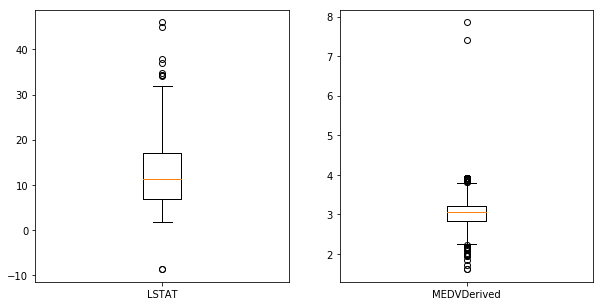

In [9]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
%matplotlib inline  
Boston = pd.read_csv(os.getcwd() + "/Boston.csv")

plt.subplots(2,1, figsize = (10,5))
ax1 = plt.subplot(1,2,1)
plt.boxplot(Boston['LSTAT'])
ax1.set_xticklabels(["LSTAT"])
ax2 = plt.subplot(1,2,2)
plt.boxplot(Boston['MEDVDerived'])
ax2.set_xticklabels(["MEDVDerived"])

Cutoffs for identifying outliers can be determined by calculating Q1 − 1.5 ∗ IQR and Q3 + 1.5 ∗ IQR, where Q1 and Q3 are the first and third quartile, respectively, and IQR = Q3 − Q1 is the interquartile range.

Inclusion of the outliers can bias models such as linear regressions (OLS). In this example the bias is largely due to the outliers with low LSTAT and high MEDV values. The following code generates a scatterplot of MEDV against LSTAT and also colors the outliers.

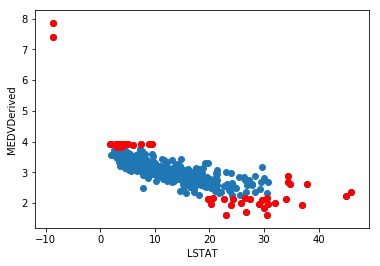

In [10]:
LSTAT_Q75 = Boston['LSTAT'].quantile(0.75)
LSTAT_Q25 = Boston['LSTAT'].quantile(0.25)
LSTAT_IQR = LSTAT_Q75 - LSTAT_Q25

upper_outlier_LSTAT = LSTAT_Q75 + 1.5*LSTAT_IQR
lower_outlier_LSTAT = LSTAT_Q25 - 1.5*LSTAT_IQR

MEDVDerived_Q75 = Boston['MEDVDerived'].quantile(0.75)
MEDVDerived_Q25 = Boston['MEDVDerived'].quantile(0.25)
MEDVDerived_IQR = MEDVDerived_Q75 - MEDVDerived_Q25

upper_outlier_MEDVDerived = MEDVDerived_Q75 + 1.5*MEDVDerived_IQR
lower_outlier_MEDVDerived = MEDVDerived_Q25 - 1.5*MEDVDerived_IQR


plt.figure()
plt.scatter(Boston['LSTAT'],Boston['MEDVDerived'])
plt.hold
outlier = Boston[(Boston['LSTAT']<lower_outlier_LSTAT) | (Boston['LSTAT']>upper_outlier_LSTAT)| (Boston['MEDVDerived']>upper_outlier_MEDVDerived) | (Boston['MEDVDerived']<lower_outlier_MEDVDerived)]
plt.scatter(outlier['LSTAT'], outlier['MEDVDerived'], color = 'red')
plt.xlabel("LSTAT")
plt.ylabel("MEDVDerived")

(b)

In [11]:
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

bosTrain = Boston.iloc[:350,]
bosTest = Boston.iloc[350:,]

y_train = bosTrain['MEDVDerived']
X_train = bosTrain[['LSTAT', 'RM', 'CHAS', 'INDUS', 'TAX', 'RAD', 'BLACK']]
y_test = bosTest['MEDVDerived']
X_test = bosTest[['LSTAT', 'RM', 'CHAS', 'INDUS', 'TAX', 'RAD', 'BLACK']]

# Linear regression
lin = LinearRegression()
lin.fit(X_train, y_train)

print 'Linear regression (OLS) train error: {} ' .format(np.sqrt(mean_squared_error(lin.predict(X_train), y_train)))
print 'Linear regression (OLS) test error: {} ' .format(np.sqrt(mean_squared_error(lin.predict(X_test), y_test)))
print("RMSE increase: {}".format(np.sqrt(mean_squared_error(lin.predict(X_test), y_test)) - np.sqrt(mean_squared_error(lin.predict(X_train), y_train))))

Linear regression (OLS) train error: 0.265114395011 
Linear regression (OLS) test error: 0.603347150386 
RMSE increase: 0.338232755375


(c)

In [12]:
huber = HuberRegressor(alpha = 0.0)
huber.fit(X_train, y_train)

print 'Linear regression (Huber loss) train error: {} ' .format(np.sqrt(mean_squared_error(huber.predict(X_train), y_train)))
print 'Linear regression (Huber loss) test error: {} ' .format(np.sqrt(mean_squared_error(huber.predict(X_test), y_test)))


Linear regression (Huber loss) train error: 0.720120132012 
Linear regression (Huber loss) test error: 0.477899423158 


(d)

In [13]:
lrate = 0.005
param_hidden = (2,)
regMLP = MLPRegressor(activation = 'tanh',
                      solver = 'sgd',
                      learning_rate='constant',
                      random_state=42,
                      batch_size=40,
                      learning_rate_init = lrate,
                      hidden_layer_sizes = param_hidden)
stdScaler = StandardScaler()
xTrain = stdScaler.fit_transform(X_train)
regMLP.fit(xTrain,y_train)

print 'MLP train error: {} ' .format(np.sqrt(mean_squared_error(regMLP.predict(stdScaler.transform(X_train)), y_train)))
print 'MLP test error: {} ' .format(np.sqrt(mean_squared_error(regMLP.predict(stdScaler.transform(X_test)), y_test)))


MLP train error: 0.30915661905 
MLP test error: 0.506514511583 


/Users/kyungwoo/anaconda/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


(e)

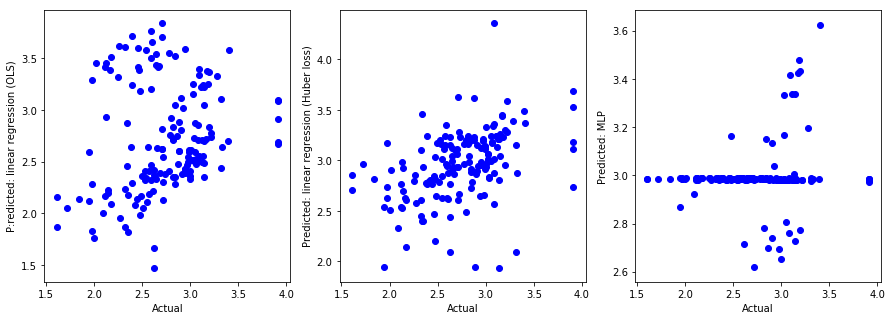

In [14]:
plt.subplots(3,1, figsize=(15,5))
ax1 = plt.subplot(1,3,1)
plt.scatter(y_test, lin.predict(X_test), label = "MLR", color = "blue")
plt.xlabel("Actual")
plt.ylabel("P:redicted: linear regression (OLS)")
ax2 = plt.subplot(1,3,2)
plt.scatter(y_test, huber.predict(X_test), label = "MLR", color = "blue")
plt.xlabel("Actual")
plt.ylabel("Predicted: linear regression (Huber loss)")
ax3 = plt.subplot(1,3,3)
plt.scatter(y_test, regMLP.predict(stdScaler.transform(X_test)), label = "MLR", color = "blue")
plt.xlabel("Actual")
plt.ylabel("Predicted: MLP")


Both the MLR with ordinary least squares (OLS) and MLP suffer from outliers.  Huber Regressor is more robust to outliers than the other two regressors.  In this evaluation, the RMSE decreases when the Huber regressor was applied in the test set.

# EIGENFACES

In this question, you will explore an application of PCA in image analysis. This question requires images.tar.gz from Canvas. This archive contains 400 images in .pgm format taken from http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html. The images can be read into python as matrices using the steps: Coding guidelines below are only for convenience and you can use any other alternatives within python that provide the same functionality, if available.

To load a given image (e.g. ‘1.pgm’) as a matrix (grey scale representation of the image) and display it, use the following code snippet :

Each image matrix is of size 112 × 92. Vectorize the matrix for each image, and concatenate all image vectors to form a big 400 × 10304 data matrix. For example, to convert ‘img’ to its vector form ‘img vec’, use the following:

In [16]:
img_vec = img.flatten()

To stack all images into a matrix, use numpy’s ‘vstack’ function. The following command will append the array ‘img_vec’ to the matrix ‘img_mat’. Note that you have to first initialize an empy ‘img mat’ with 10304 columns and 0 rows.

In [17]:
img_width, img_height = np.shape(img)
img_mat = np.zeros((0,img_width*img_height))
img_mat = np.vstack((img_mat, img_vec))

Each face can be represented as weighted sum of canonical matrices called eigenfaces. You will project the data matrix onto lower dimensions and see how inclusion of directions in decreasing order of importance according to data spread impacts the quality of the image.

(a) Perform PCA using the sklearn [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) package.  Create i) a scree plot depicting the proportion of variance and ii) a cumulative proportion of variance explained by the first 50 principal components of the img_mat data.  Refer to Figure 10.4 of JW for an example.  You may use the output attribute *explained variance ratio*. 

(b) How many principal components (N1, N2, N3) are required to explain cumulative variance of 20%, 50%, and 80%, respectively?

(c) Reconstruct your original matrix using the number of principal components (N1, N2, N3) you derived in question (b).  Then, pick any one image and plot.  Note that you first want to reshape your vectorized image using the ‘reshape’ command in numpy:

In [18]:
# rec_img = np.reshape(rec_mat[n,:], (img_width,img_height))

Here ‘rec_mat’ is your recovered image matrix using only top-k principal components. (should be of dimension 400 × 10304) and you want to convert the nth vector to an image of the original size (img width = 112 and img height = 92).
You can plot an image matrix using the following function (pylab library should be loaded).

In [19]:
# import pylab
# pylab.figure()
# pylab.imshow(rec_img, cmap=plt.cm.gray)
# pylab.show()

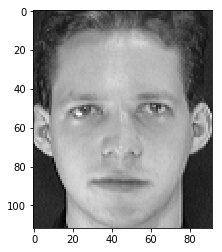

In [15]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import os
%matplotlib inline

img_path = os.getcwd()+'/images/'
img = misc.imread(img_path + '1.pgm')
plt.imshow(img, cmap=plt.cm.gray)

(a)

In [20]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
import pylab
from sklearn.decomposition import PCA

img_path = './images/'

img = misc.imread(img_path + '1.pgm') # to initialize the matrix to appropriate size
img_width, img_height = np.shape(img)
img_mat = np.zeros((0,img_width*img_height))

for n in range(400):
    img = misc.imread(img_path + np.str(n+1) + '.pgm')
    img_vec = img.flatten()
    img_mat = np.vstack((img_mat,img_vec))

print img_mat.shape
X = img_mat
pca = PCA()
pca.fit(X)

(400, 10304)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

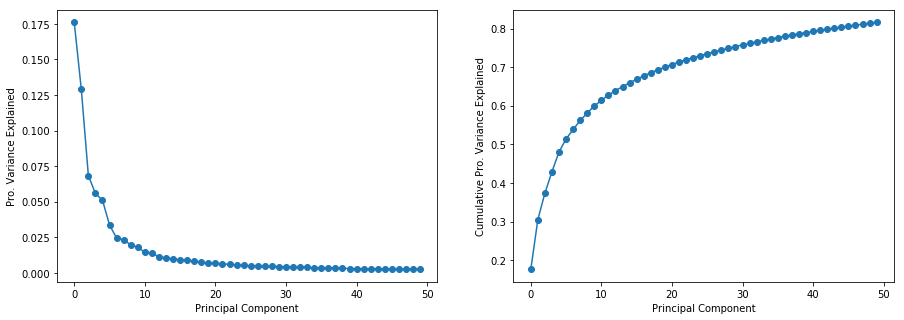

In [21]:
plt.subplots(2,1, figsize=(15,5))
ax1 = plt.subplot(1,2,1)
plt.plot(pca.explained_variance_ratio_[:50], '-o')
plt.xlabel("Principal Component")
plt.ylabel("Pro. Variance Explained")
ax1 = plt.subplot(1,2,2)
plt.plot(np.cumsum(pca.explained_variance_ratio_[:50]), '-o')
plt.xlabel("Principal Component")
plt.ylabel("Cumulative Pro. Variance Explained")

(b)

In [22]:
N1 = np.where(np.cumsum(pca.explained_variance_ratio_)>=0.20)[0][0]+1
N2 = np.where(np.cumsum(pca.explained_variance_ratio_)>=0.50)[0][0]+1
N3 = np.where(np.cumsum(pca.explained_variance_ratio_)>=0.80)[0][0]+1

print '20% of variance explained by {} principal components' .format(N1)
print '50% of variance explained by {} principal components' .format(N2)
print '80% of variance explained by {} principal components' .format(N3)


20% of variance explained by 2 principal components
50% of variance explained by 6 principal components
80% of variance explained by 44 principal components


(c)

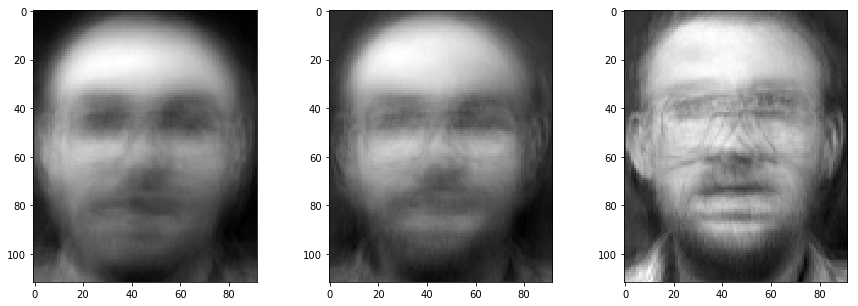

In [23]:
pca_N1 = PCA(n_components=N1)
rec_mat_N1 = pca_N1.inverse_transform(pca_N1.fit_transform(X))

pca_N2 = PCA(n_components=N2)
rec_mat_N2 = pca_N2.inverse_transform(pca_N2.fit_transform(X))

pca_N3 = PCA(n_components=N3)
rec_mat_N3 = pca_N3.inverse_transform(pca_N3.fit_transform(X))

n = 50
rec_img_N1 = np.reshape(rec_mat_N1[n,:], (img_width,img_height))
rec_img_N2 = np.reshape(rec_mat_N2[n,:], (img_width,img_height))
rec_img_N3 = np.reshape(rec_mat_N3[n,:], (img_width,img_height))


plt.subplots(3,1, figsize=(15,5))
ax1 = plt.subplot(1,3,1)
pylab.imshow(rec_img_N1, cmap=plt.cm.gray)
ax1 = plt.subplot(1,3,2)
pylab.imshow(rec_img_N2, cmap=plt.cm.gray)
ax1 = plt.subplot(1,3,3)
pylab.imshow(rec_img_N3, cmap=plt.cm.gray)
